# Introduction to Python  

## Pandas - Exploratory Data Analysis (EDA) part 2

In [4]:
import os
import zipfile
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

## Pandas Data Manipulation: Baby names in the USA

In [5]:
names1880 = pd.read_csv(os.path.join('../../Data','txt','names','yob1880.txt'), names=['name', 'sex', 'births'])

In [6]:
names1880[0:20]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [7]:
#names1880.head()
names1880.tail()

,name,sex,births
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5
1999,Zachariah,M,5


In [8]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [10]:
years = range(1880, 2020)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = os.path.join('../../Data', 'txt', 'names','yob{}.txt'.format(year))
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [11]:
names.head(10)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [12]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988203 entries, 0 to 1988202
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 60.7+ MB


In [13]:
names.groupby('sex').births.sum()

sex
F    175690160
M    179285222
Name: births, dtype: int64

In [14]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [15]:
total_births

sex,F,M
year,,
1880,90993,110491
1881,91955,100746
1882,107850,113687
1883,112322,104630
1884,129022,114445
...,...,...
2015,1781725,1913059
2016,1767902,1893471
2017,1721550,1845472


In [16]:
total_births.tail()

sex,F,M
year,,
2015,1781725,1913059
2016,1767902,1893471
2017,1721550,1845472
2018,1694640,1809166
2019,1665373,1779948


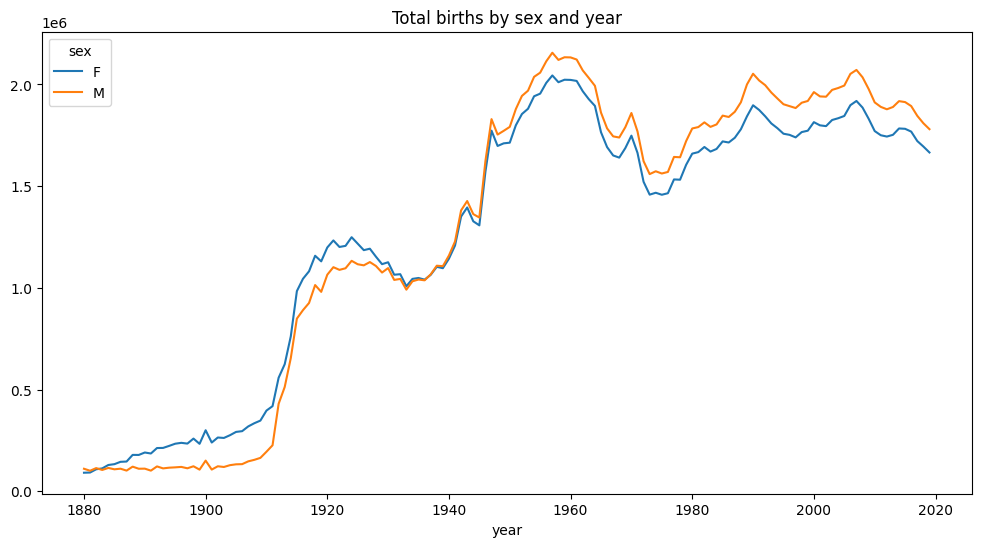

In [17]:
total_births.plot(title='Total births by sex and year', figsize=(12,6));

In [18]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['percent'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

C:\Users\WZHRERO\AppData\Local\Temp\1\ipykernel_11632\688551148.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  names = names.groupby(['year', 'sex']).apply(add_prop)


In [19]:
#names
names.head()

,name,sex,births,year,percent
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [20]:
names[names.percent > 0.085]

,name,sex,births,year,percent
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086269
2938,John,M,8769,1881,0.087041
7116,John,M,8894,1883,0.085004


In [21]:
names[names.name.str.startswith('Stephany')]

,name,sex,births,year,percent
91312,Stephany,F,6,1910,0.000015
95509,Stephany,F,8,1911,0.000019
101809,Stephany,F,5,1912,0.000009
106541,Stephany,F,13,1913,0.000021
113864,Stephany,F,12,1914,0.000016
...,...,...,...,...,...
1826773,Stephany,F,155,2015,0.000087
1860288,Stephany,F,111,2016,0.000063
1893459,Stephany,F,99,2017,0.000058
1926348,Stephany,F,81,2018,0.000048


In [22]:
np.allclose(names.groupby(['year', 'sex']).percent.sum(), 1)

True

In [23]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [24]:
#top1000
pd.options.display.float_format = '{:,.3f}'.format
top1000[:15]

name sex  births  year  percent
year sex                                         
1880 F   0        Mary   F    7065  1880    0.078
         1        Anna   F    2604  1880    0.029
         2        Emma   F    2003  1880    0.022
         3   Elizabeth   F    1939  1880    0.021
         4      Minnie   F    1746  1880    0.019
         5    Margaret   F    1578  1880    0.017
         6         Ida   F    1472  1880    0.016
         7       Alice   F    1414  1880    0.016
         8      Bertha   F    1320  1880    0.015
         9       Sarah   F    1288  1880    0.014
         10      Annie   F    1258  1880    0.014
         11      Clara   F    1226  1880    0.013
         12       Ella   F    1156  1880    0.013
         13   Florence   F    1063  1880    0.012
         14       Cora   F    1045  1880    0.011

In [25]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [26]:
Walter_names = boys[boys.name=='Walter']
Walter_names[:10]

,,,name,sex,births,year,percent
year,sex,,,,,,
1880,M,954,Walter,M,1755,1880,0.016
1881,M,2950,Walter,M,1670,1881,0.017
1882,M,4975,Walter,M,1805,1882,0.016
1883,M,7128,Walter,M,1705,1883,0.016
1884,M,9330,Walter,M,1902,1884,0.017
1885,M,11652,Walter,M,1808,1885,0.017
1886,M,14031,Walter,M,1880,1886,0.017
1887,M,16447,Walter,M,1705,1887,0.017
1888,M,18988,Walter,M,2040,1888,0.017


In [27]:
top1000.drop(['sex','year'], axis=1, inplace=True)
total_births_top1000 = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [28]:
total_births_top1000.head()

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Aayan,Ab,Abagail,...,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.000,NaN,NaN,NaN,NaN,...,NaN,NaN,7.000,NaN,8.000,28.000,27.000,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.000,NaN,NaN,NaN,NaN,...,NaN,NaN,10.000,NaN,9.000,21.000,27.000,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.000,NaN,NaN,NaN,NaN,...,NaN,NaN,9.000,NaN,17.000,32.000,21.000,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.000,NaN,NaN,NaN,NaN,...,NaN,NaN,10.000,NaN,11.000,35.000,25.000,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.000,NaN,NaN,NaN,NaN,...,NaN,NaN,14.000,6.000,8.000,58.000,27.000,NaN,NaN,NaN


array([<AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>,
       <AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>],
      dtype=object)

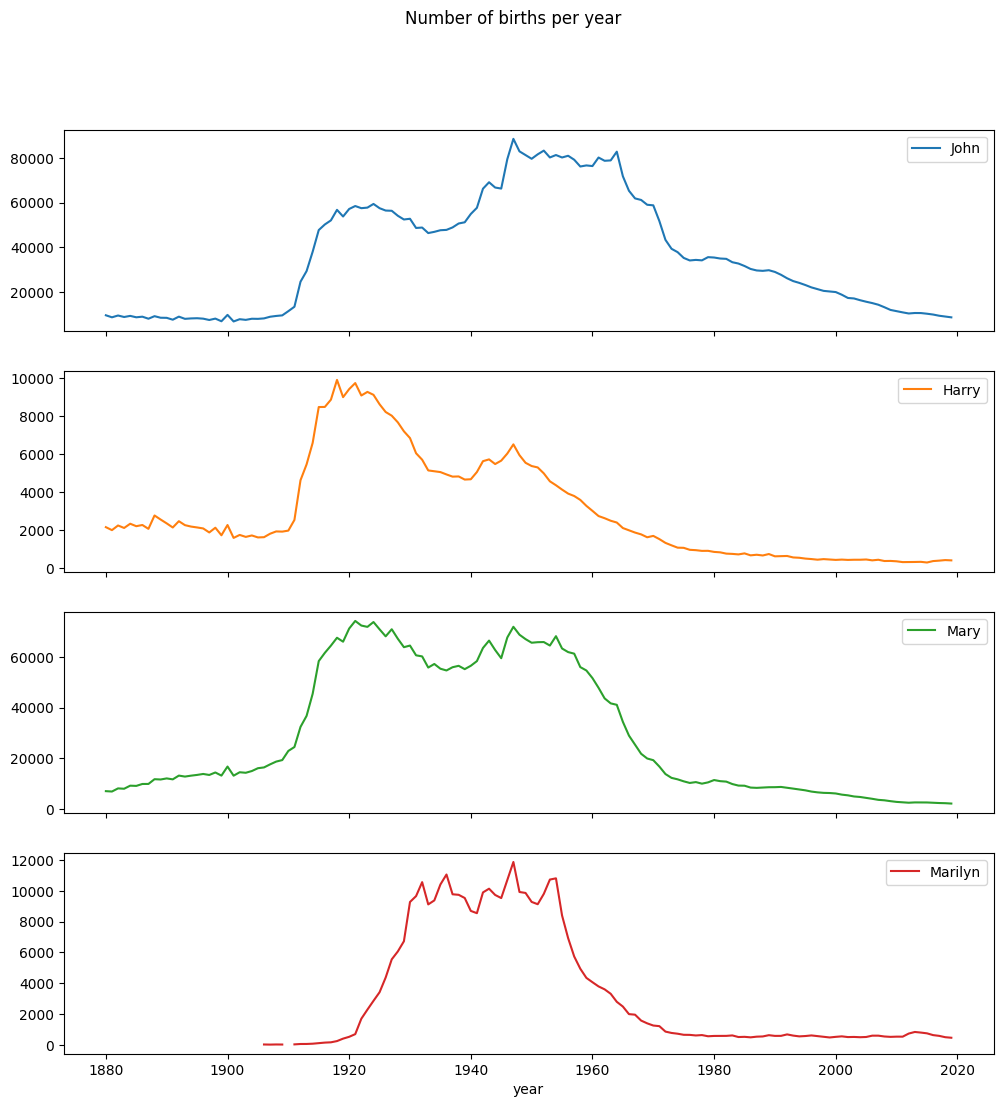

In [29]:
subset = total_births_top1000[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 12), grid=False,
title="Number of births per year")

<AxesSubplot: title={'center': 'Sum of table1000.percent by year and sex'}, xlabel='year'>

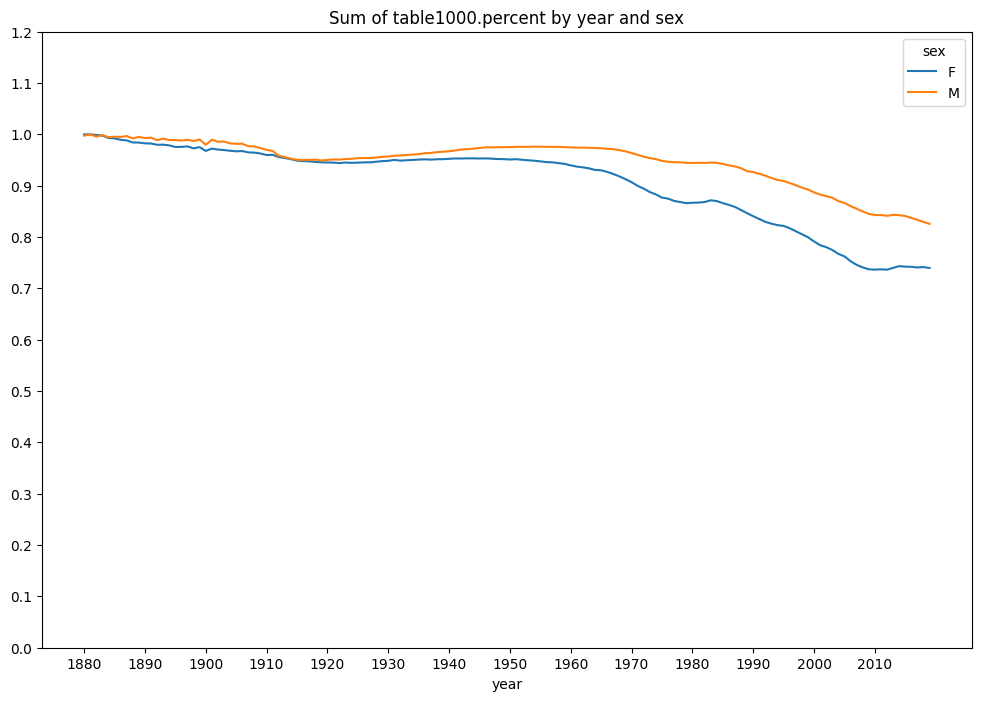

In [30]:
table = top1000.pivot_table('percent', index='year', columns='sex', aggfunc=sum)

table.plot(title='Sum of table1000.percent by year and sex', 
           yticks=np.linspace(0, 1.2, 13), 
           xticks=range(1880, 2020, 10), 
           figsize=(12,8))

In [31]:
df = boys[boys.year == 2019]
prop_cumsum = df.sort_values(by='percent', ascending=False).percent.cumsum()

In [32]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='percent', ascending=False)
    return group.percent.cumsum().values.searchsorted(q) + 1

prop_cumsum.values.searchsorted(0.5)

154

In [33]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

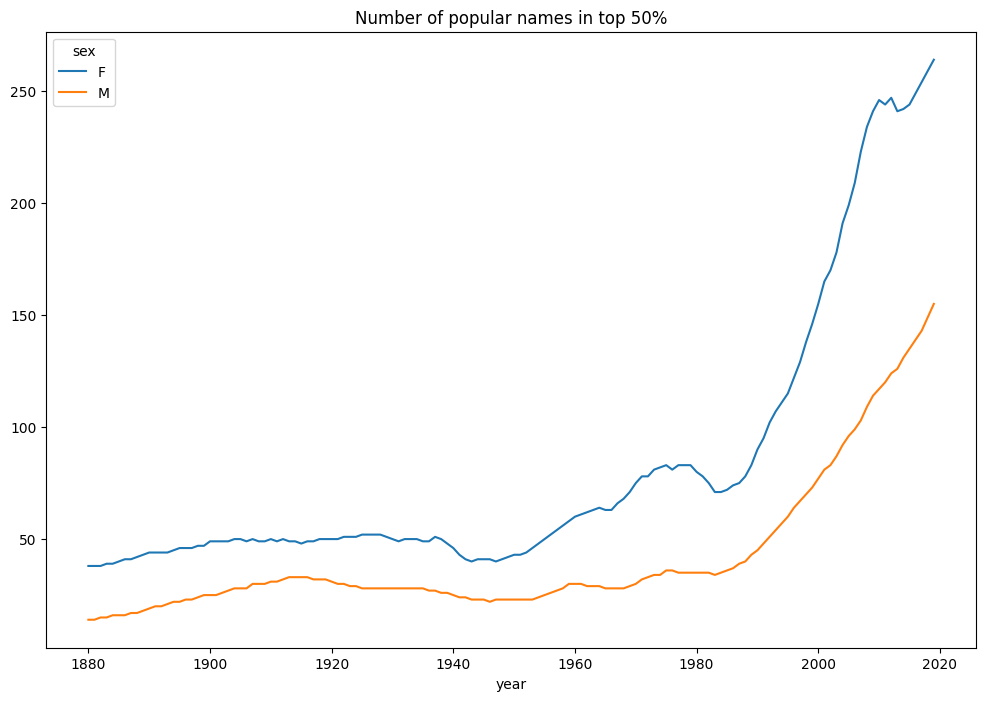

In [34]:
diversity.plot(title="Number of popular names in top 50%", figsize=(12,8))

In [35]:
# extract last letter from name column

get_last_letter = lambda x: x[-1]
last_letters = names['name'].map(get_last_letter)

last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                   F                                  M              \
year               1910        1960        2010       1910        1960   
last_letter                                                              
a           108,395.000 691,251.000 675,059.000    977.000   5,207.000   
b                   NaN     694.000     454.000    411.000   3,914.000   
c                 5.000      49.000     953.000    482.000  15,472.000   
d             6,751.000   3,732.000   2,633.000 22,114.000 262,140.000   
e           133,592.000 435,050.000 315,891.000 28,662.000 178,814.000   

sex                      
year               2010  
last_letter              
a            28,772.000  
b            39,149.000  
c            23,279.000  
d            44,690.000  
e           129,916.000

In [36]:
subtable.sum()

sex  year
F    1910     396,482.000
     1960   2,022,126.000
     2010   1,770,632.000
M    1910     194,214.000
     1960   2,132,733.000
     2010   1,911,572.000
dtype: float64

In [37]:
letter_prop = subtable / subtable.sum().astype(float)

<AxesSubplot: title={'center': 'Female'}, xlabel='last_letter'>

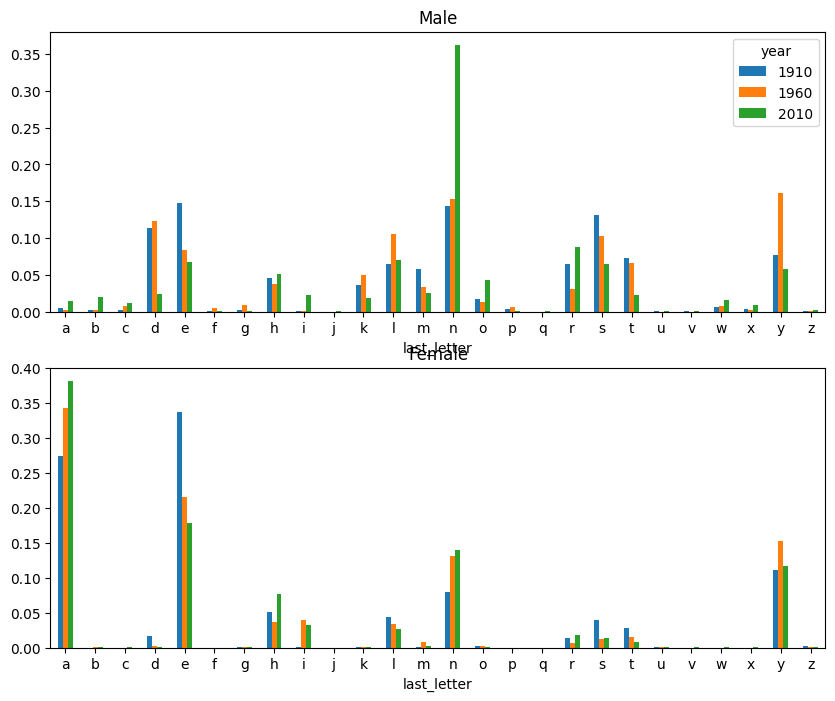

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)

In [39]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083,0.153,0.076
1881,0.083,0.153,0.077
1882,0.085,0.150,0.078
1883,0.084,0.152,0.079
1884,0.086,0.150,0.080


In [40]:
letter_prop

sex             F                                                        ...  \
year         1880  1881  1882  1883  1884  1885  1886  1887  1888  1889  ...   
last_letter                                                              ...   
a           0.346 0.343 0.339 0.341 0.339 0.341 0.340 0.335 0.333 0.329  ...   
b             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
c             NaN   NaN 0.000 0.000   NaN   NaN   NaN   NaN   NaN   NaN  ...   
d           0.007 0.007 0.007 0.007 0.007 0.006 0.007 0.007 0.007 0.008  ...   
e           0.367 0.371 0.375 0.373 0.373 0.373 0.373 0.372 0.374 0.374  ...   
f             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
g           0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ...   
h           0.053 0.052 0.052 0.051 0.051 0.050 0.049 0.049 0.048 0.049  ...   
i           0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001  ...   
j             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
k           0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ...   
l           0.028 0.032 0.033 0.034 0.037 0.039 0.040 0.042 0.044 0.047  ...   
m           0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001  ...   
n           0.033 0.032 0.033 0.034 0.035 0.036 0.036 0.038 0.038 0.040  ...   
o           0.000 0.001 0.000 0.000 0.001 0.001 0.001 0.001 0.001 0.001  ...   
p             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
q             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
r           0.005 0.005 0.005 0.006 0.006 0.006 0.006 0.006 0.007 0.007  ...   
s           0.015 0.014 0.015 0.016 0.016 0.016 0.017 0.019 0.020 0.020  ...   
t           0.024 0.024 0.022 0.023 0.022 0.022 0.021 0.022 0.021 0.021  ...   
u           0.004 0.005 0.004 0.004 0.004 0.004 0.004 0.003 0.003 0.003  ...   
v             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
w             NaN 0.000   NaN   NaN   NaN   NaN 0.000   NaN   NaN   NaN  ...   
x             NaN   NaN   NaN 0.000   NaN   NaN   NaN   NaN   NaN   NaN  ...   
y           0.115 0.113 0.113 0.107 0.108 0.105 0.103 0.103 0.100 0.099  ...   
z           0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.002  ...   

sex             M                                                        
year         2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  
last_letter                                                              
a           0.015 0.014 0.014 0.015 0.015 0.015 0.016 0.016 0.017 0.018  
b           0.020 0.019 0.018 0.018 0.016 0.015 0.014 0.013 0.013 0.012  
c           0.012 0.012 0.013 0.013 0.012 0.012 0.012 0.011 0.011 0.010  
d           0.023 0.023 0.022 0.023 0.023 0.023 0.023 0.023 0.023 0.023  
e           0.068 0.068 0.068 0.070 0.069 0.067 0.067 0.066 0.066 0.066  
f           0.001 0.001 0.001 0.001 0.002 0.001 0.002 0.002 0.002 0.002  
g           0.001 0.001 0.002 0.002 0.002 0.003 0.003 0.003 0.003 0.003  
h           0.052 0.052 0.052 0.053 0.053 0.054 0.054 0.054 0.054 0.054  
i           0.023 0.023 0.025 0.024 0.024 0.026 0.026 0.027 0.028 0.030  
j           0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001  
k           0.019 0.018 0.018 0.018 0.019 0.019 0.019 0.020 0.020 0.020  
l           0.070 0.070 0.068 0.067 0.067 0.067 0.067 0.066 0.065 0.065  
m           0.025 0.027 0.029 0.030 0.031 0.031 0.031 0.032 0.033 0.033  
n           0.363 0.364 0.361 0.354 0.351 0.346 0.342 0.338 0.334 0.324  
o           0.043 0.042 0.041 0.042 0.043 0.045 0.048 0.050 0.054 0.057  
p           0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001  
q           0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  
r           0.087 0.088 0.089 0.090 0.093 0.095 0.094 0.094 0.094 0.094  
s           0.065 0.064 0.064 0.066 0.067 0.068 0.070 0.072 0.073 0.076  
t           0.023 0.024 0.025 0.026 0.027 0.029 0.0

<AxesSubplot: xlabel='year'>

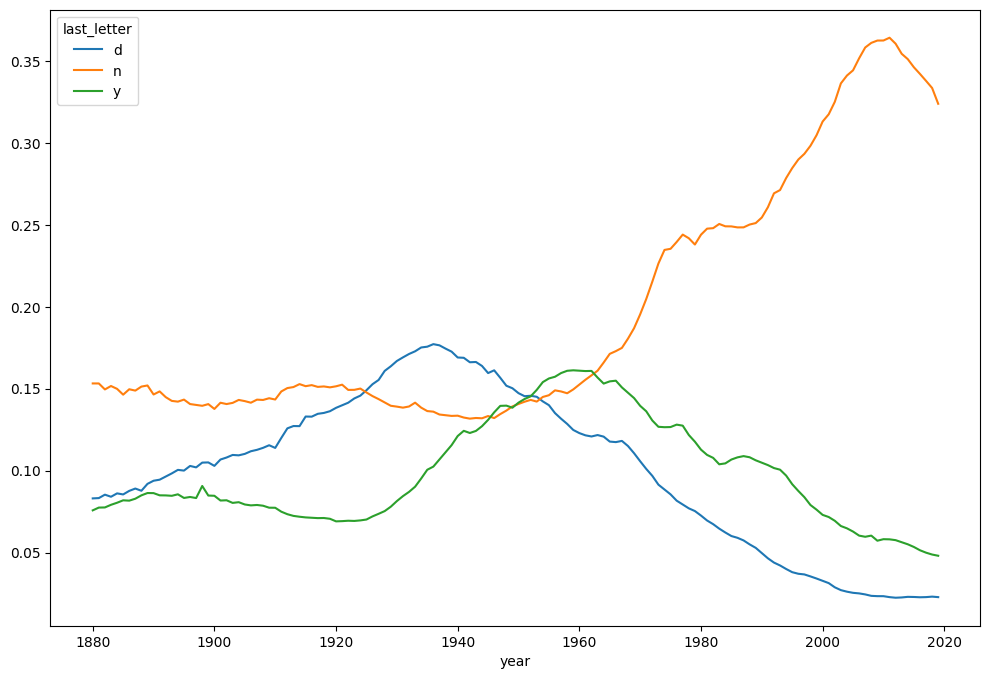

In [41]:
dny_ts.plot(figsize=(12,8))

In [42]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [43]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35028
Lesli        929
Leslie    378647
Lesly      11429
Name: births, dtype: int64

In [44]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2015,1.000,NaN
2016,1.000,NaN
2017,1.000,NaN
2018,1.000,NaN
2019,1.000,NaN


<AxesSubplot: xlabel='year'>

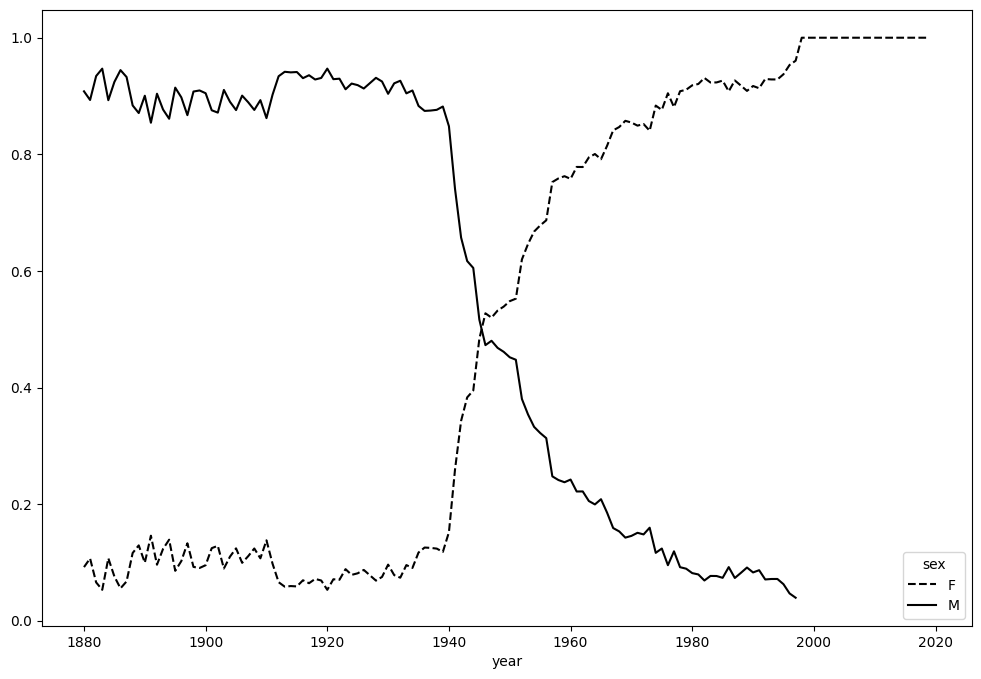

In [45]:
table.plot(style={'M': 'k-', 'F': 'k--'}, figsize=(12,8))